<img src="multiple.png" width="500" height="740"> 


#  **Módulo 3: Regresión Lineal Múltiple**
#
## En este módulo aprenderemos:
## 1. Concepto de **regresión lineal múltiple**.
## 2. Ajuste del modelo en Python.
## 3. Interpretación de los coeficientes.
## 4. Evaluación del modelo (R² ajustado, p-valores, multicolinealidad).
## 5. Ejemplo aplicado en logística: costo de transporte en función de distancia, peso y volumen.



# **1. Concepto**
#
## La **regresión lineal múltiple** se usa cuando queremos explicar una variable dependiente
## a partir de **dos o más variables independientes**.
#
## Modelo general:
## 
## $$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_k X_k + \varepsilon$$
## 
#
## **Ejemplo en logística**:
## 
## $$Costo = \beta_0 + \beta_1 (\text{Distancia}) + \beta_2 (\text{Peso}) + \beta_3 (\text{Volumen}) + \varepsilon$$
## 

In [36]:
# %% [codigo]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

sns.set(style="whitegrid", palette="muted")


#  **2. Dataset**
#
## Supongamos que tenemos datos de **30 envíos** con:
#
## - Distancia (millas)
## - Peso (toneladas)
## - Volumen (m³)
## - Costo (USD)
#
#  **Podemos reemplazar estos datos ficticios por un dataset real (ej. Kaggle Freight).**

In [5]:
# %% [codigo]
# Dataset simulado
np.random.seed(42)
n = 30
data = pd.DataFrame({
    "Distancia": np.random.randint(50, 500, n),
    "Peso": np.random.randint(1, 20, n),
    "Volumen": np.random.randint(5, 50, n)
})
# Creamos el costo como combinación lineal con algo de ruido
data["Costo"] = 50 + 0.8*data["Distancia"] + 15*data["Peso"] + 8*data["Volumen"] + np.random.normal(0, 30, n)

data.head()

,Distancia,Peso,Volumen,Costo
0,152,12,44,721.063684
1,485,17,8,783.632454
2,398,10,6,593.229970
3,320,16,10,648.649934
4,156,15,46,761.585023



#  **3. Ajuste del modelo de regresión múltiple**

In [7]:
# %% [codigo]
X = data[["Distancia", "Peso", "Volumen"]]
y = data["Costo"]

# Usamos sklearn
modelo = LinearRegression()
modelo.fit(X, y)

print("Intercepto:", modelo.intercept_)
print("Coeficientes:", modelo.coef_)

Intercepto: 80.81637773284581
Coeficientes: [ 0.76651337 14.89197579  7.49363217]



# **Interpretación:**
## - Intercepto: costo fijo base del transporte.
## - β1 (Distancia): costo adicional por cada milla.
## - β2 (Peso): costo adicional por cada tonelada.
## - β3 (Volumen): costo adicional por cada m³.

#
#  **4. Validación estadística con Statsmodels**

In [10]:
# %% [codigo]
X_sm = sm.add_constant(X)  # agrega columna constante
modelo_sm = sm.OLS(y, X_sm).fit()
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Costo   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     178.9
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           1.80e-17
Time:                        12:34:34   Log-Likelihood:                -144.96
No. Observations:                  30   AIC:                             297.9
Df Residuals:                      26   BIC:                             303.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.8164     26.650      3.033      0.0


# **En el resumen:**
# - **coef**: estimaciones de los coeficientes.
# - **P>|t|**: significancia estadística de cada variable.
# - **R-squared**: proporción de variabilidad explicada.
# - **Adj. R-squared**: versión ajustada (útil cuando hay muchas variables).

# %% [markdown]
# ## 5. Visualización de resultados
#
# Aunque tenemos varias variables, podemos comparar:
# - Valores observados vs valores predichos.
# - Residuos del modelo.

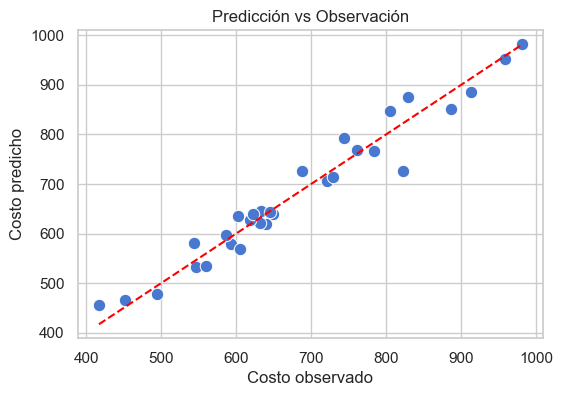

In [13]:
# %% [code]
y_pred = modelo.predict(X)

plt.figure(figsize=(6,4))
sns.scatterplot(x=y, y=y_pred, s=80)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.xlabel("Costo observado")
plt.ylabel("Costo predicho")
plt.title("Predicción vs Observación")
plt.show()

#
#  **Si los puntos están cercanos a la línea roja (45°), el modelo tiene buen ajuste.**


#  **6. Ejercicio propuesto**
#
## Usa el mismo dataset y responde:
## 1. Ajusta el modelo eliminando la variable **Volumen**.  
## 2. Compara el R² ajustado con el modelo completo.  
## 3. ¿Mejora o empeora la capacidad predictiva?  
## 4. Interpreta qué variable parece más relevante (según p-valores).

Intercepto: 364.39465874870587
Coeficientes: [ 0.5879764  13.10776213]


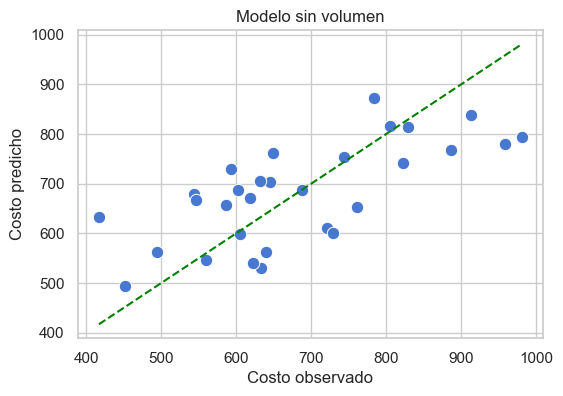

In [16]:
# %% [codigo]
# 🚀 Espacio de práctica
X2 = data[["Distancia", "Peso"]]
modelo2 = LinearRegression().fit(X2, y)

print("Intercepto:", modelo2.intercept_)
print("Coeficientes:", modelo2.coef_)

y_pred2 = modelo2.predict(X2)

plt.figure(figsize=(6,4))
sns.scatterplot(x=y, y=y_pred2, s=80)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="green", linestyle="--")
plt.xlabel("Costo observado")
plt.ylabel("Costo predicho")
plt.title("Modelo sin volumen")
plt.show()


#
# **En este módulo aprendimos:**
## - Qué es la regresión lineal múltiple.
## - Cómo ajustar e interpretar los coeficientes.
## - Cómo evaluar el modelo con métricas y pruebas estadísticas.
#
# En el próximo módulo iniciaremos con **Series de Tiempo** aplicadas a logística.